# Titanic dataset logistic regression and random forest comparison
## In this demo I import the titanic dataset, clean the data for use in SKLearn models, and train a logistic regression and random forest model on it

In [250]:
import pandas as pd
import numpy as np

In [251]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Convert cabin column from string to int by removing "C" also do this for ticket

In [252]:
df['Cabin']=df['Cabin'].str.extract('(\d+)',expand=False)
df['Cabin']=pd.to_numeric(df['Cabin'])

In [253]:
df['Ticket']=df['Ticket'].astype(str)
df['Ticket']=df['Ticket'].str.extract('(\d+)',expand=False)
df['Ticket']=pd.to_numeric(df['Ticket'])

In [254]:
df['Age']=pd.to_numeric(df['Age'])

## Find columns with missing cells 

In [255]:
missing__val_cols=df.columns[df.isnull().any()].tolist()
missing__val_cols

['Age', 'Ticket', 'Cabin', 'Embarked']

## Let's look at the distribution of these different variabels 

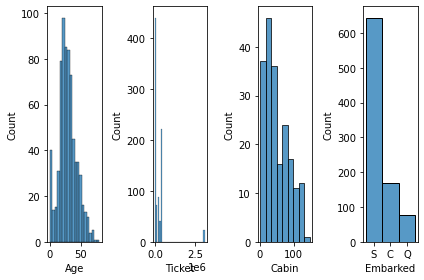

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns
missing_val_dist_plot=plt.figure(1)
plt_count=1
for i in range(len(missing_val_cols)):
    col=missing_val_cols[i]
    plt.subplot(1,4,plt_count)
    sns.histplot(x=col,data=df)
    plt_count+=1
plt.tight_layout()

## Replace mising values with modal values

In [257]:
for m in missing_val_cols:
   df[m].fillna(df[m].mode()[0], inplace=True) 

In [258]:
recheck_missing_val_cols=df.columns[df.isnull().any()].values
print(recheck_missing_val_cols)

[]


## No missing values so far so let's move on 

In [259]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,5.0,7.2500,33.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599.0,71.2833,85.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,2.0,7.9250,33.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803.0,53.1000,123.0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450.0,8.0500,33.0,S


## Looking at what variables seem to matter in terms of survival

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

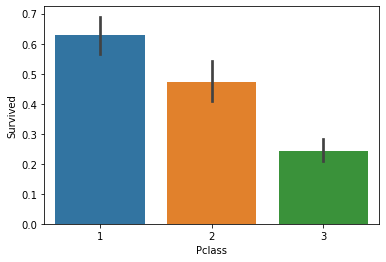

In [260]:
sns.barplot(x='Pclass',y='Survived',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

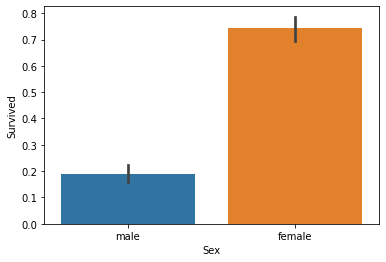

In [261]:
sns.barplot(x='Sex',y='Survived',data=df)

<AxesSubplot:xlabel='Age_mean', ylabel='Survived_mean'>

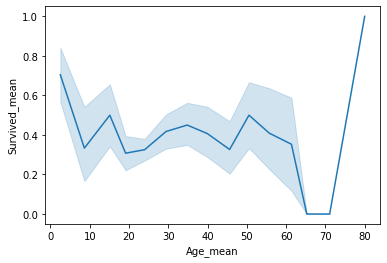

In [262]:
mod_df=df.copy()
bins=15
mod_df['Survived_bins']=pd.cut(mod_df['Survived'],bins)
mod_df['Age_bins']=pd.cut(mod_df['Age'],bins)
mod_df['Survived_mean']=mod_df.groupby('Survived_bins')['Survived'].transform('mean')
mod_df['Age_mean']=mod_df.groupby('Age_bins')['Age'].transform('mean')
sns.lineplot(x='Age_mean',y='Survived_mean',data=mod_df)

<AxesSubplot:xlabel='Fare_mean', ylabel='Survived_mean'>

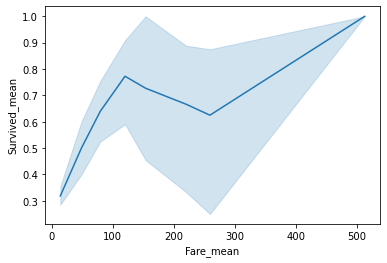

In [263]:
mod_df['Fare_bins']=pd.cut(mod_df['Fare'],bins)
mod_df['Fare_mean']=mod_df.groupby('Fare_bins')['Fare'].transform('mean')
sns.lineplot(x='Fare_mean',y='Survived_mean',data=mod_df)

<AxesSubplot:xlabel='Cabin_mean', ylabel='Survived_mean'>

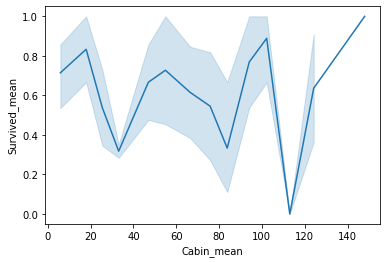

In [264]:
mod_df['Cabin_bins']=pd.cut(mod_df['Cabin'],bins)
mod_df['Cabin_mean']=mod_df.groupby('Cabin_bins')['Cabin'].transform('mean')
sns.lineplot(x='Cabin_mean',y='Survived_mean',data=mod_df)

## Mark change nonnumeric data to numeric

In [265]:
log_df=df.copy()
non_num=['Embarked','Sex']
converted=pd.get_dummies(log_df[non_num])
log_df=log_df.drop(columns=non_num)
log_df=pd.concat([log_df,converted],axis=1)
log_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,5.0,7.2500,33.0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,17599.0,71.2833,85.0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,2.0,7.9250,33.0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803.0,53.1000,123.0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450.0,8.0500,33.0,0,0,1,0,1


In [266]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

## Normalize X data and scale then split into train and test data

In [267]:
X=log_df.drop(columns=['Survived','Name'])
X=StandardScaler().fit_transform(X)
Y=log_df['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

## Train logistic regression model

In [268]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)

In [269]:
accuracy_score(Y_pred, Y_test)

0.7985074626865671

In [270]:
confusion_matrix(Y_pred, Y_test)

array([[141,  27],
       [ 27,  73]], dtype=int64)

## Train random forest model

In [271]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
forest.fit(X_train,Y_train)
Y_pred_forest=forest.predict(X_test)
accuracy_score(Y_pred_forest,Y_test)

0.8283582089552238

## Both models have comparable accuracy, with random forest being slightly higher